**Idris abdellah**

In [368]:
#Imort statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Response**

Q1: reverse order

In [369]:
# check https://docs.python.org/2/whatsnew/2.3.html#extended-slices
x1 = 3286
x1= str(x1)
x1[len(x1)::-1] # -1 is the step

'6823'

Q2: 

In [370]:
def reverse_number(x1):
  x1= str(x1)
  return (x1[::-1]) 
print("Reversed number of 274 =",reverse_number(274))
print("Reversed number of 15739 =",reverse_number(15739))

Reversed number of 274 = 472
Reversed number of 15739 = 93751


Palindrome

In [371]:
# Q3
def is_palindromic(x):
    return reverse_number(x) == str(x)

print(is_palindromic(1221))
print(is_palindromic(16461))

True
True


In [372]:
# Q4
dic = dict()
numbers = [i for i in range(10, 100)]
dic['number'] = numbers
is_palindromic = [is_palindromic(i) for i in range(10, 100)]
dic['palindromic ?'] = is_palindromic

In [373]:
# Q5
df = pd.DataFrame.from_dict(dic)
df.head()

,number,palindromic ?
0,10,False
1,11,True
2,12,False
3,13,False
4,14,False


In [374]:
#Q6
total_palindrom = df['palindromic ?'].sum()
print("Total number  of palindrom in dic = ", total_palindrom)

Total number  of palindrom in dic =  9


In [375]:
#Q7
def is_nontrivial_reverse_number(x):
    reverse = reverse_number(x)
    x_9 = x * 9
    x_4 = x * 4
    return (str(x_9) == reverse) or (str(x_4) == reverse)
print(is_nontrivial_reverse_number(1089))
print(is_nontrivial_reverse_number(2000))
print(is_nontrivial_reverse_number(7887))

True
False
False


In [376]:
#Q8
t_df = pd.read_csv("/content/titanic.csv")
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [377]:
#Q9
print(t_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [378]:
t_df = t_df.drop(columns=['Cabin'], axis=1)
t_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [379]:
for column_name in  t_df.columns:
  print(column_name," nan value = " , end = '')
  print(t_df[column_name].isna().sum())

PassengerId  nan value = 0
Survived  nan value = 0
Pclass  nan value = 0
Name  nan value = 0
Sex  nan value = 0
Age  nan value = 177
SibSp  nan value = 0
Parch  nan value = 0
Ticket  nan value = 0
Fare  nan value = 0
Embarked  nan value = 2


In [380]:
#Q10
# raplace nan in age by the average
average_age = t_df['Age'].mean()
t_df['Age'] = t_df['Age'].fillna(average_age)
print("Nan value in Age columns : ",t_df['Age'].isna().sum())
# replace nan by s in Embarked columns
t_df['Embarked'] = t_df['Embarked'].fillna('S')

Nan value in Age columns :  0


In [381]:
null_values = t_df.isnull().sum()
print(total_null_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [382]:
#Q11
age_labels = ['0-9', '10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100']
t_df['age_group'] = pd.cut(t_df['Age'], range(0, 101, 10), right=False, labels=age_labels)
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40


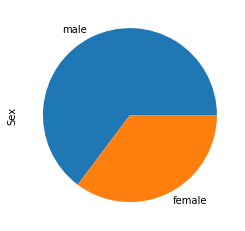

In [383]:
t_df['Sex'].value_counts().plot.pie()

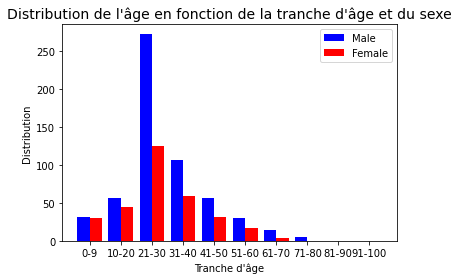

In [384]:
tick_spacing = np.array(range(len(age_labels)))+0.2
male_data = t_df[t_df.Sex == "male"].groupby('age_group').size()
female_data = t_df[t_df.Sex == "female"].groupby('age_group').size()

ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4

ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')

plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Distribution")
ax.set_xlabel("Tranche d'âge")
ax.set_title("Distribution de l'âge en fonction de la tranche d'âge et du sexe",fontsize=14)
plt.legend()
plt.show()


## Prediction whether a person survived or no

In [385]:
def categorie_age(x):
    if x < 18 :
        return 'mineur'
    elif  18<= x < 30:
        return 'jeune'
    elif  30<=x < 60:
        return "adulte"
    else :
        return 'vieux'

In [386]:
t_df.drop(['Name','PassengerId' , 'SibSp','Parch', 'Ticket','Embarked', 'Fare'], axis = 1, inplace = True)

In [387]:
t_df['Age'] = t_df['Age'].map(lambda x : categorie_age(x))

In [388]:
df_pr = t_df.groupby(['Sex', 'Age', 'Pclass']).mean().dropna()
df_pr['proba']= df_pr['Survived'].map(lambda x :  'survie' if x > 0.5 else 'meurt' )
df_pr.head()

Survived   proba
Sex    Age    Pclass                  
female adulte 1       0.980769  survie
              2       0.909091  survie
              3       0.280000   meurt
       jeune  1       0.967742  survie
              2       0.903226  survie

In [389]:
def survie(sex, age, pclass):
  if(pclass<1 or pclass>3):
        raise Exception('Pclass value must be 1,2 or 3')
  try:
    cat_age = categorie_age(age)
    a = df_pr.loc[pd.IndexSlice[sex, cat_age, pclass]]
  except Exception as e:
    print("an error occured : maybe the  data does not exist")
  else:
    return a['proba']

In [390]:
survie('male',32,3)

'meurt'

In [391]:
survie('male',4,1)

'survie'

In [392]:
survie('female',68,1)

'survie'

In [393]:
survie('female',18,3)

'survie'